In [47]:
# Load dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('dataset.csv',index_col=[0])

In [48]:
df

,Price,ram_in_gb,ddr_version,processor_name,gen_type,OS,disk_drive,storage_in_gb,size_in_inches,touchscreen,company,graphic_card
0,"16,990",4,4,Intel,10,Windows,SSD,512,11.6,No,Primebook,No
1,"18,990",4,4,Intel,10,Windows,SSD,512,11.6,No,Primebook,No
2,"38,990",8,4,Intel,10,Windows,SSD,512,15.6,No,Asus,No
3,"47,990",8,4,AMD,Not Mentioned,Windows,SSD,1000,15.6,No,Asus,No
4,"38,990",8,4,Intel,10,Windows,SSD,256,14.0,No,HP,No
...,...,...,...,...,...,...,...,...,...,...,...,...
1146,"20,990",4,4,AMD,Not Mentioned,Windows,SSD,128,14.0,No,Lenovo,No
1147,"97,990",8,4,Intel,9,Windows,Both,1000+256,15.6,No,Acer,Yes
1148,"94,990",8,4,Intel,8,Windows,SSD,512,13.3,Yes,Lenovo,No
1149,"99,990",16,4,Intel,10,Windows,SSD,1000,13.3,No,Asus,No


In [49]:
df['Price'] = df['Price'].str.replace(",","").astype(int)

### 1. Harga  Processor

In [50]:
ram = df.groupby(['processor_name'],as_index=False).sum().sort_values(by='Price',ascending=False)[["processor_name",'Price']].reset_index(drop=True)
ram

,processor_name,Price
0,Intel,65484999
1,AMD,20791899
2,Microsoft,96657


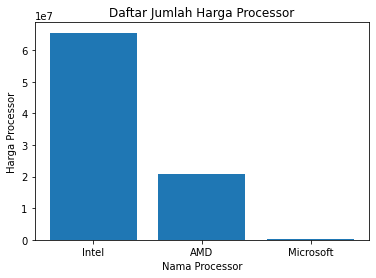

In [51]:
plt.title('Daftar Jumlah Harga Processor')
plt.ylabel('Harga Processor')
plt.xlabel('Nama Processor')
plt.bar(ram['processor_name'],ram['Price'])
plt.show()

### 2. Ram in Gb

In [52]:
ram = df.groupby(['ram_in_gb'],as_index=False).sum().sort_values(by='Price',ascending=False)[["ram_in_gb",'Price']].reset_index(drop=True)
ram

,ram_in_gb,Price
0,8,44880256
1,16,34254383
2,4,7677332
3,32,4845694
4,2,620960


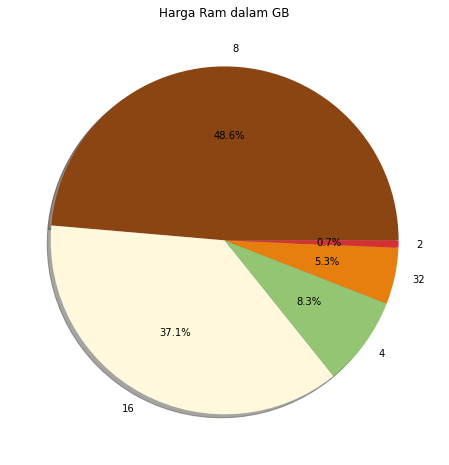

In [53]:
plt.figure(figsize=(12,8))
colors = ('#8B4513','#FFF8DC','#93C572','#E67F0D','#D53032')
plt.title('Harga Ram dalam GB')
plt.pie(
    ram['Price'],
    labels=ram['ram_in_gb'],
    autopct='%1.1f%%',
    colors=colors,
    shadow=True
)
plt.show()

### 3. DDR Version

In [54]:
ram = df.groupby(['ddr_version'],as_index=False).sum().sort_values(by='Price',ascending=False)[["ddr_version",'Price']].reset_index(drop=True)
ram

,ddr_version,Price
0,4,70544014
1,5,17299458
2,3,4232673
3,8,202480


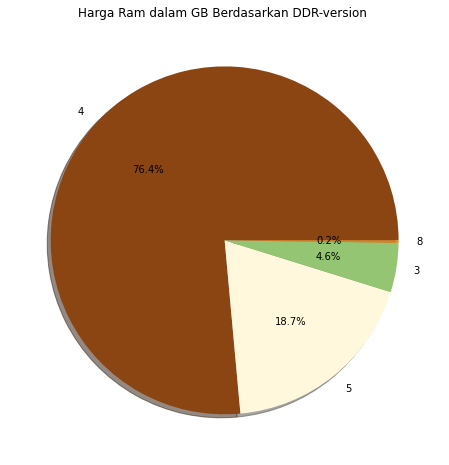

In [55]:
plt.figure(figsize=(12,8))
colors = ('#8B4513','#FFF8DC','#93C572','#E67F0D','#D53032')
plt.title('Harga Ram dalam GB Berdasarkan DDR-version ')
plt.pie(
    ram['Price'],
    labels=ram['ddr_version'],
    autopct='%1.1f%%',
    colors=colors,
    shadow=True
)
plt.show()

### 4 Type generation of processor

In [57]:
ram = df.groupby(['gen_type'],as_index=False).sum().sort_values(by='Price',ascending=False)[["gen_type",'Price']].reset_index(drop=True)
ram.drop(index=[1],axis=0,inplace=True)
ram

,gen_type,Price
0,10,54146640
2,8,5870581
3,9,2321221
4,7,1400854
5,5,202377
6,2,117900
7,3,46990


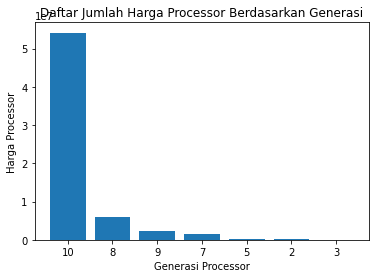

In [59]:
plt.title('Daftar Jumlah Harga Processor Berdasarkan Generasi')
plt.ylabel('Harga Processor')
plt.xlabel('Generasi Processor')
plt.bar(ram['gen_type'],ram['Price'])
plt.show()

### 5. Company laptops prices

In [60]:
ram = df.groupby(['company'],as_index=False).sum().sort_values(by='Price',ascending=False)[["company",'Price']].reset_index(drop=True)
ram.drop(index=[1],axis=0,inplace=True)
ram

,company,Price
0,Asus,29649488
2,Lenovo,9731151
3,MSI,9611287
4,Dell,8770760
5,Apple,5630137
6,Acer,4765089
7,alienware,2037420
8,Spectre,1582987
9,Primebook,1152350
10,Surface,887378


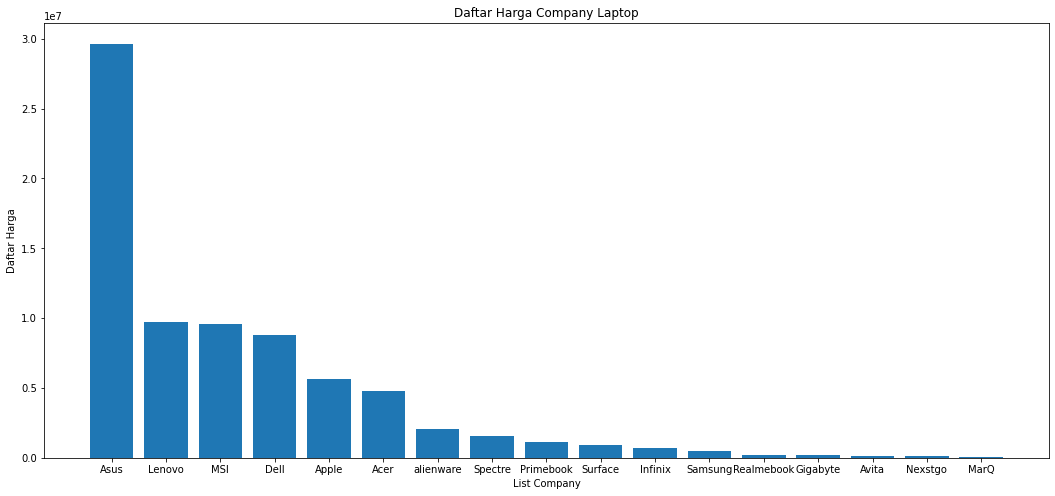

In [66]:
plt.figure(figsize=(18,8))
plt.title('Daftar Harga Company Laptop')
plt.ylabel('Daftar Harga')
plt.xlabel('List Company')
plt.bar(ram['company'],ram['Price'])
plt.show()